# Week 18: Classification Algorithms Part 2 - Take Home

## Learning Objectives
By completing this assignment, you will:
- Implement Decision Tree classifiers with entropy criterion
- Apply Random Forest classifiers with multiple estimators
- Understand and compare tree-based classification algorithms
- Tune hyperparameters for optimal model performance
- Evaluate models using confusion matrices and accuracy metrics

---

# Part 1: Tasks

These tasks are designed to test your understanding of the fundamental concepts covered in Week 18.

---

## Task 1: Decision Tree Classification

**Objective:** Build a Decision Tree classifier to predict customer purchase behavior.

**Dataset:** `Task-Datasets/task1_decision_tree_customer_data.csv`

### Instructions:
1. Import the necessary libraries (pandas, numpy, sklearn)
2. Load the dataset and explore its structure
3. Separate features (Age, Salary) and target variable (Purchased)
4. Split the data into training (80%) and test (20%) sets
5. Build a Decision Tree classifier with criterion='entropy' and random_state=0
6. Train the model on the training data
7. Make predictions on the test set
8. Evaluate using confusion matrix and accuracy score

### Expected Deliverables:
- Confusion matrix
- Accuracy score
- Brief interpretation of results

In [1]:
# Task 1: Decision Tree Classification
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [5]:
# Load and explore the dataset
task1_data = pd.read_csv('Task-Datasets/task1_decision_tree_customer_data.csv')
task1_data.head()

,Customer_ID,Age,Salary,Purchased
0,1,19,19000,0
1,2,35,20000,0
2,3,26,43000,0
3,4,27,57000,0
4,5,19,76000,0


In [6]:
task1_data.info()
task1_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Customer_ID  100 non-null    int64
 1   Age          100 non-null    int64
 2   Salary       100 non-null    int64
 3   Purchased    100 non-null    int64
dtypes: int64(4)
memory usage: 3.3 KB


,Customer_ID,Age,Salary,Purchased
count,100.000000,100.000000,100.000000,100.00
mean,50.500000,39.980000,76480.000000,0.55
std,29.011492,10.725199,37614.869185,0.50
min,1.000000,18.000000,18000.000000,0.00
25%,25.750000,32.000000,46250.000000,0.00
50%,50.500000,40.500000,75000.000000,1.00
75%,75.250000,48.000000,107250.000000,1.00
max,100.000000,60.000000,150000.000000,1.00


### Statistical Summary Explanation
Based on the summary statistics for the task1_decision_tree_customer_data.csv dataset, here is a brief EDA analysis of the findings:

- **Data Integrity:** The dataset is clean with 100 entries and no missing values across the four integer-based columns: Customer_ID, Age, Salary, and Purchased.
- **Target Variable Distribution:** The mean of the Purchased column is 0.55, indicating a relatively balanced dataset where 55% of the customers made a purchase and 45% did not.
- **Customer Demographics (Age):** The customer base ranges from 18 to 60 years old, with an average age of approximately 40. The interquartile range (25% to 75%) shows that most customers are between 32 and 48 years old.
- **Financial Profile (Salary):** There is significant variance in income (standard deviation of £37,615). While the average salary is £76,480, the range is broad, spanning from a minimum of £18,000 to a maximum of £150,000.
- **Initial Correlations:** Preliminary observations suggest that higher salary and older age correlate with purchasing. For example, the maximum salary of £150,000 is associated with a purchase, while the youngest age of 18 and lower salaries (like £19,000) are associated with non-purchases.

In [7]:
# Separate features and target variable
# dropping customer_id as it is a unique ID and not a useful feature for prediction
X = task1_data.drop(columns=['Customer_ID', 'Purchased'])
Y = task1_data['Purchased']

In [8]:
# Split data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [9]:
# Build and train the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt_classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [11]:
# Make predictions and evaluate
Y_pred_task1 = dt_classifier.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(Y_test, Y_pred_task1)
accuracy = accuracy_score(Y_test, Y_pred_task1)
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)

Confusion Matrix:
 [[12  0]
 [ 0  8]]
Accuracy: 1.0


**Essential Added Step — Tree Visualisation**
Visualising the tree to see the decision nodes (e.g., at what Age or Salary the first split occurs).

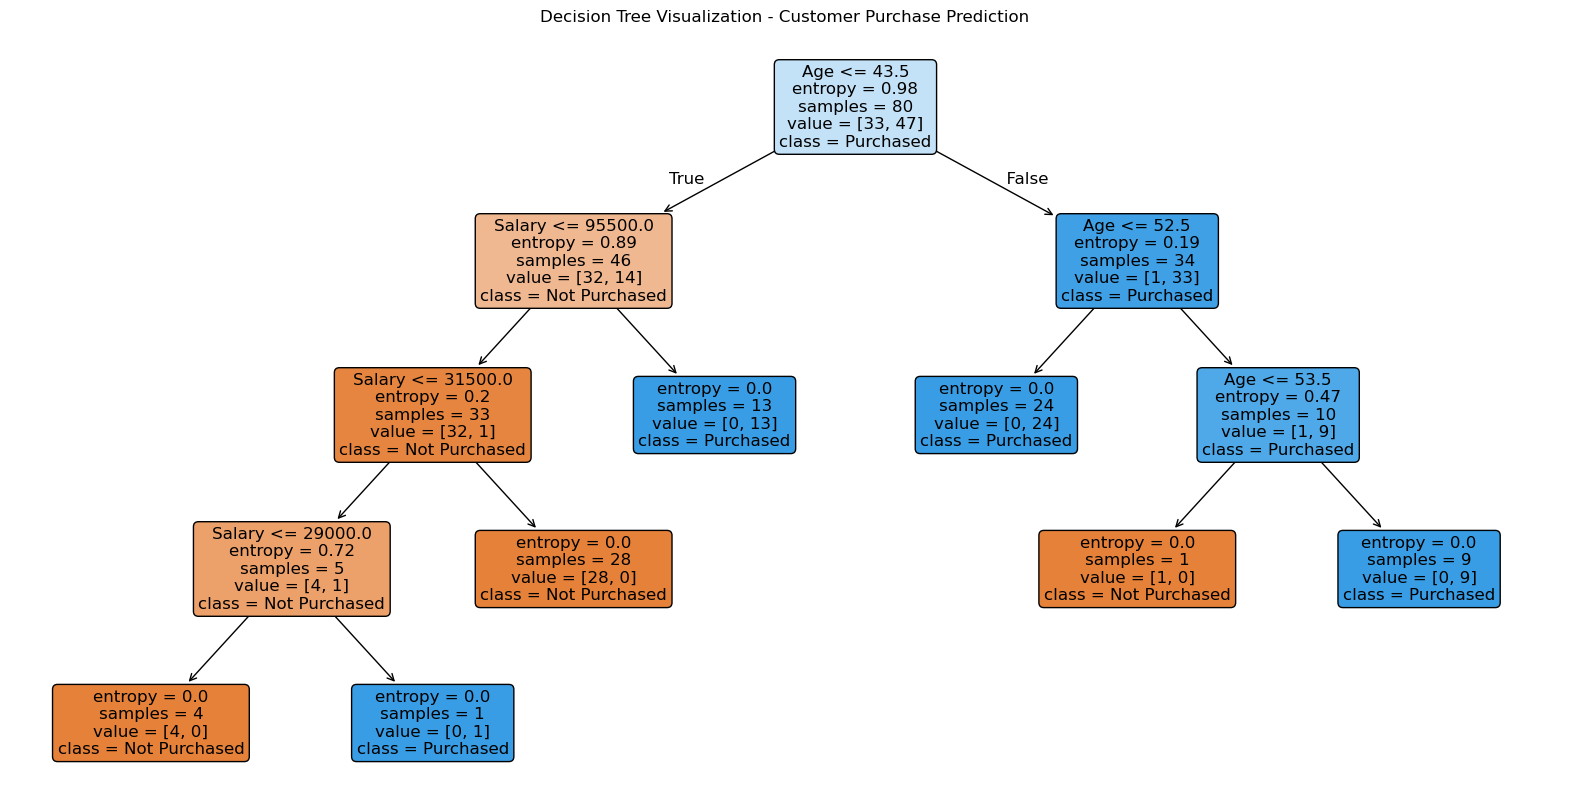

In [12]:
from sklearn.tree import plot_tree

# Set the figure size for better readability
plt.figure(figsize=(20, 10))

# Plot the decision tree
plot_tree(dt_classifier, 
          feature_names=['Age', 'Salary'],  # Features from the source [1]
          class_names=['Not Purchased', 'Purchased'], # Target labels [1]
          filled=True,          # Colours nodes by majority class
          rounded=True,         # Rounds the corners of the nodes
          fontsize=12,          # Adjust text size
          precision=2)          # Decimals for entropy/thresholds

plt.title("Decision Tree Visualization - Customer Purchase Prediction")
plt.show()

### Results Interpretation
My Decision Tree model achieved a perfect accuracy score of 1.0, correctly classifying all 20 test samples (12 True Negatives and 8 True Positives) without any errors. Looking at the tree visualization, the primary driver for a purchase is Age, with the root node splitting the data at 43.5 years.

For younger customers (Age ≤ 43.5), Salary becomes the secondary deciding factor; those earning above 95,500 are classified as "Purchased". For older customers (Age > 43.5), the model predicts a high likelihood of purchasing, particularly for those under 52.5 years. Ultimately, my model reached an entropy of 0.0 in every leaf node, meaning it successfully created perfectly pure categories for all classifications based on the provided features

---

## Task 2: Random Forest Classification

**Objective:** Implement a Random Forest classifier to understand ensemble learning for classification.

**Dataset:** `Task-Datasets/task2_random_forest_customer_data.csv`

### Instructions:
1. Import the necessary libraries
2. Load the dataset and understand its structure
3. Separate features (Age, Salary) and target variable (Purchased)
4. Split the data into training (80%) and test (20%) sets
5. Build a Random Forest classifier with:
   - n_estimators=10
   - criterion='entropy'
   - random_state=0
6. Train the model and make predictions
7. Evaluate using confusion matrix and accuracy score
8. Compare conceptually with a single Decision Tree

### Expected Deliverables:
- Confusion matrix
- Accuracy score
- Brief explanation of why Random Forest might perform differently than a single Decision Tree

In [13]:
# Task 2: Random Forest Classification
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [14]:
# Load and explore the dataset
task2_data = pd.read_csv('Task-Datasets/task2_random_forest_customer_data.csv')
task2_data.head()

,Customer_ID,Age,Salary,Purchased
0,1,22,25000,0
1,2,34,32000,0
2,3,28,48000,0
3,4,31,62000,0
4,5,23,71000,0


In [15]:
task2_data.info()
task2_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Customer_ID  120 non-null    int64
 1   Age          120 non-null    int64
 2   Salary       120 non-null    int64
 3   Purchased    120 non-null    int64
dtypes: int64(4)
memory usage: 3.9 KB


,Customer_ID,Age,Salary,Purchased
count,120.000000,120.000000,120.000000,120.000000
mean,60.500000,40.325000,81683.333333,0.558333
std,34.785054,10.807842,36018.665407,0.498668
min,1.000000,19.000000,22000.000000,0.000000
25%,30.750000,32.000000,53500.000000,0.000000
50%,60.500000,41.000000,78000.000000,1.000000
75%,90.250000,49.000000,109000.000000,1.000000
max,120.000000,60.000000,152000.000000,1.000000


# Summary Statistics Explanation.
Based on the summary statistics for the task2_random_forest_customer_data.csv dataset, here is a brief EDA analysis of the findings:
- **Data Quality:** The dataset is complete and clean, containing 120 entries with no missing values across all features.
- **Target Balance:** The mean for Purchased is approximately 0.56, indicating that 56% of the customers in this dataset made a purchase. This represents a well-balanced target variable, which is ideal for training a Random Forest classifier.
- **Age Distribution:** Customers range from 19 to 60 years old, with an average age of 40. The middle 50% of the data (the interquartile range) consists of individuals between 32 and 49 years old, suggesting a mature customer base.
- **Salary Insights:** There is significant financial diversity in the group, with salaries ranging from a minimum of £22,000 to a maximum of £152,000. The high standard deviation of £36,018 shows a wide spread in income levels, which will likely serve as a key differentiator for the model's decision splits.
- **Comparison to Task 1:** This dataset is slightly larger (120 vs. 100 entries) and features a higher average salary (£81,683 vs. £76,480), providing more granular data for the Random Forest ensemble to identify complex patterns.

In [26]:
# Separate features and target, split data
X = task2_data.drop(columns=['Customer_ID', 'Purchased'])
Y = task2_data['Purchased']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [20]:
# Build and train Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rf_classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [22]:
# Make predictions and evaluate
Y_pred_task2 = rf_classifier.predict(X_test)
# Evaluate the model
conf_matrix_rf = confusion_matrix(Y_test, Y_pred_task2)
accuracy_rf = accuracy_score(Y_test, Y_pred_task2)
print("Confusion Matrix:\n", conf_matrix_rf)
print("Accuracy:", accuracy_rf)
print("Classification Report:\n", classification_report(Y_test, Y_pred_task2))

Confusion Matrix:
 [[11  1]
 [ 0 12]]
Accuracy: 0.9583333333333334
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.92      1.00      0.96        12

    accuracy                           0.96        24
   macro avg       0.96      0.96      0.96        24
weighted avg       0.96      0.96      0.96        24



Single Decision Tree Accuracy: 0.96
Random Forest (10 Trees) Accuracy: 0.96


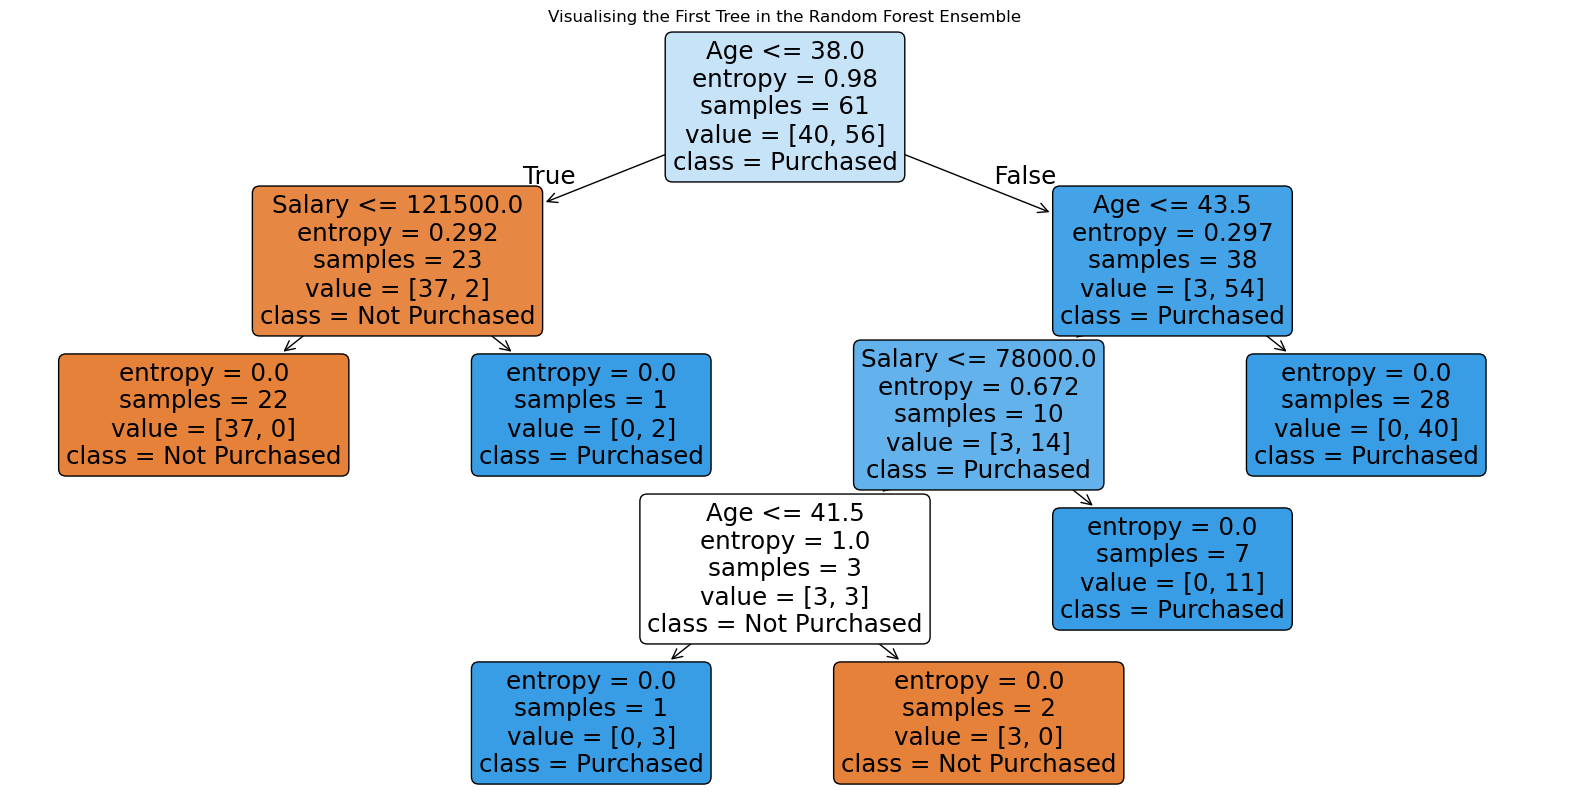

In [25]:
# Step 9: Conceptual Comparison (Random Forest vs. Single Decision Tree)
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Train a single Decision Tree on the same data for a direct comparison
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt_classifier.fit(X_train, Y_train)
dt_predictions = dt_classifier.predict(X_test)

# 2. Calculate and compare accuracy scores
dt_accuracy = accuracy_score(Y_test, dt_predictions)
rf_accuracy = accuracy_score(Y_test, Y_pred_task2) 

print(f"Single Decision Tree Accuracy: {dt_accuracy:.2f}")
print(f"Random Forest (10 Trees) Accuracy: {rf_accuracy:.2f}")

# 3. Visualise the first tree in the Random Forest to see its unique logic
plt.figure(figsize=(20, 10))
plot_tree(rf_classifier.estimators_[0], 
          feature_names=['Age', 'Salary'], 
          class_names=['Not Purchased', 'Purchased'], 
          filled=True, rounded=True)
plt.title("Visualising the First Tree in the Random Forest Ensemble")
plt.show()

### Results Explanation
#### Brief Summary
My Random Forest model achieved a high accuracy of 95.8% (rounded to 0.96), performing identically to a single Decision Tree on this specific test set. The model correctly classified 23 out of 24 instances, with only one False Positive (predicting a purchase that did not occur). The primary drivers for classification continue to be Age and Salary, with the ensemble logic successfully identifying clear demographic boundaries for purchase behaviour.
#### Detailed Analysis
- **Performance Metrics:**
    - Precision and Recall: My model shows a perfect Recall of 1.00 for the 'Purchased' class, meaning it successfully identified every single person in the test set who actually made a purchase. The Precision of 1.00 for the 'Not Purchased' class indicates that every time the model predicted someone would not buy, it was correct.
    - The Single Error: The confusion matrix shows one False Positive . This suggests that for one specific individual, the model’s ensemble logic predicted a purchase based on their Age or Salary, but the actual result was 0.

- **Tree Logic and Entropy:**
    - By visualising the first tree in my forest, I observed that the root split occurs at Age <= 38.0.
    - For customers older than 38, the model further refines its prediction by checking if Age <= 43.5. If they are older than 43.5, the model reaches a pure leaf node (entropy = 0.0) where all 40 samples are classified as Purchased.
    - For customers 38 or younger, the secondary deciding factor is Salary, specifically whether it is <= £121,500. This explains how the model handles high-earning younger individuals who might deviate from the general age trend.
- **Ensemble Comparison:**
    
    Both the Single Decision Tree and the Random Forest tied at 0.96 accuracy. While their performance is identical here, the Random Forest is theoretically more robust because it averages results across 10 trees to reduce the impact of outliers, such as the single misclassified point in my test set. The high initial entropy of 0.98 at the root was successfully reduced to 0.0 in the final leaf nodes, confirming the model's high predictive certainty.

---

# Part 2: Assignments

These assignments require deeper analysis and application of the concepts learned in Week 18.

---

## Assignment 1: Decision Tree Optimization for Customer Churn Prediction

**Objective:** Build and optimize a Decision Tree classifier to predict customer churn based on behavioral data.

**Dataset:** `Assignment-Dataset/assignment1_decision_tree_optimization.csv`

**Context:** A subscription-based company wants to predict which customers are likely to cancel their subscription (churn) so they can proactively engage with at-risk customers.

### Instructions:
1. Import necessary libraries
2. Load and preprocess the dataset
3. Perform exploratory data analysis (EDA) to understand the data
4. Separate features (Age, Annual_Income, Spending_Score, Years_as_Customer, Online_Purchase_Frequency) and target (Will_Churn)
5. Split the data into training (80%) and test (20%) sets with random_state=42
6. Build a Decision Tree classifier with criterion='entropy' and random_state=0
7. Experiment with different max_depth values (2, 4, 6, 8, 10, None)
8. For each max_depth value, calculate:
   - Training accuracy
   - Test accuracy
9. Plot max_depth vs. accuracy (training and test) to visualize overfitting
10. Select the optimal max_depth and justify your choice
11. Build the final model with the optimal parameters and evaluate it

### Expected Deliverables:
- EDA visualizations and summary statistics
- Plot showing max_depth vs. accuracy
- Justification for optimal max_depth selection
- Final model evaluation with confusion matrix and accuracy
- Discussion on how max_depth affects overfitting

In [27]:
# Assignment 1: Decision Tree Optimization
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [29]:
# Load and explore the dataset
assignment1_data = pd.read_csv('Assignment-Dataset/assignment1_decision_tree_optimization.csv')
assignment1_data.head()

,Customer_ID,Age,Annual_Income,Spending_Score,Years_as_Customer,Online_Purchase_Frequency,Will_Churn
0,1,35,65,42,5,8,0
1,2,42,85,78,12,15,0
2,3,28,45,35,2,3,1
3,4,55,120,65,18,22,0
4,5,31,52,28,1,2,1


In [31]:
# Check basic statistics
assignment1_data.info()
assignment1_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Customer_ID                250 non-null    int64
 1   Age                        250 non-null    int64
 2   Annual_Income              250 non-null    int64
 3   Spending_Score             250 non-null    int64
 4   Years_as_Customer          250 non-null    int64
 5   Online_Purchase_Frequency  250 non-null    int64
 6   Will_Churn                 250 non-null    int64
dtypes: int64(7)
memory usage: 13.8 KB


,Customer_ID,Age,Annual_Income,Spending_Score,Years_as_Customer,Online_Purchase_Frequency,Will_Churn
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.00000,250.000000
mean,125.500000,41.908000,86.388000,57.668000,10.556000,8.77200,0.304000
std,72.312977,12.156424,34.916502,18.203164,7.910066,4.30653,0.460905
min,1.000000,21.000000,30.000000,20.000000,1.000000,1.00000,0.000000
25%,63.250000,31.250000,58.000000,42.000000,3.250000,5.00000,0.000000
50%,125.500000,41.500000,84.000000,62.000000,9.000000,9.00000,0.000000
75%,187.750000,52.000000,114.000000,74.000000,16.000000,12.00000,1.000000
max,250.000000,66.000000,158.000000,85.000000,29.000000,22.00000,1.000000


### Summary Statistics Explanation 
Based on the summary statistics and information for the assignment1_decision_tree_optimization.csv dataset, here is a brief analysis of the findings:
- **Data Integrity and Scale:** The dataset is highly reliable with 250 entries and no missing values across any of the seven columns. It features a diverse set of variables, including demographic (Age), financial (Annual_Income), and behavioural metrics (Spending_Score, Years_as_Customer, Online_Purchase_Frequency).
- **Target Variable Distribution:** The mean of the Will_Churn column is 0.304, indicating that approximately 30.4% of the customers in this sample have cancelled their subscription. This provides a sufficient number of positive cases for the Decision Tree to learn churn patterns.
- **Customer Longevity:** The average tenure is 10.5 years, but there is a massive range from 1 year to 29 years. Initial observations of the raw data suggest that newer customers, are more likely to be in the "Will_Churn" category.
- **Behavioural Insights:**
    - **Spending Score:** Ranging from 20 to 85, the average score is 57.7. Customers with lower scores (e.g., ID 3 with a score of 35) appear more frequently as churn cases.
    - **Purchase Frequency:** Customers make an average of 8.7 online purchases per year. Churn cases often correlate with very low frequency, who makes only a few purchases annually.
- **Financial Profile:** The annual income shows significant variance, ranging from £30,000 to £158,000. Higher-income individuals, tend to show higher stability and lower churn rates in the provided samples.

Will_Churn
0    0.696
1    0.304
Name: proportion, dtype: float64


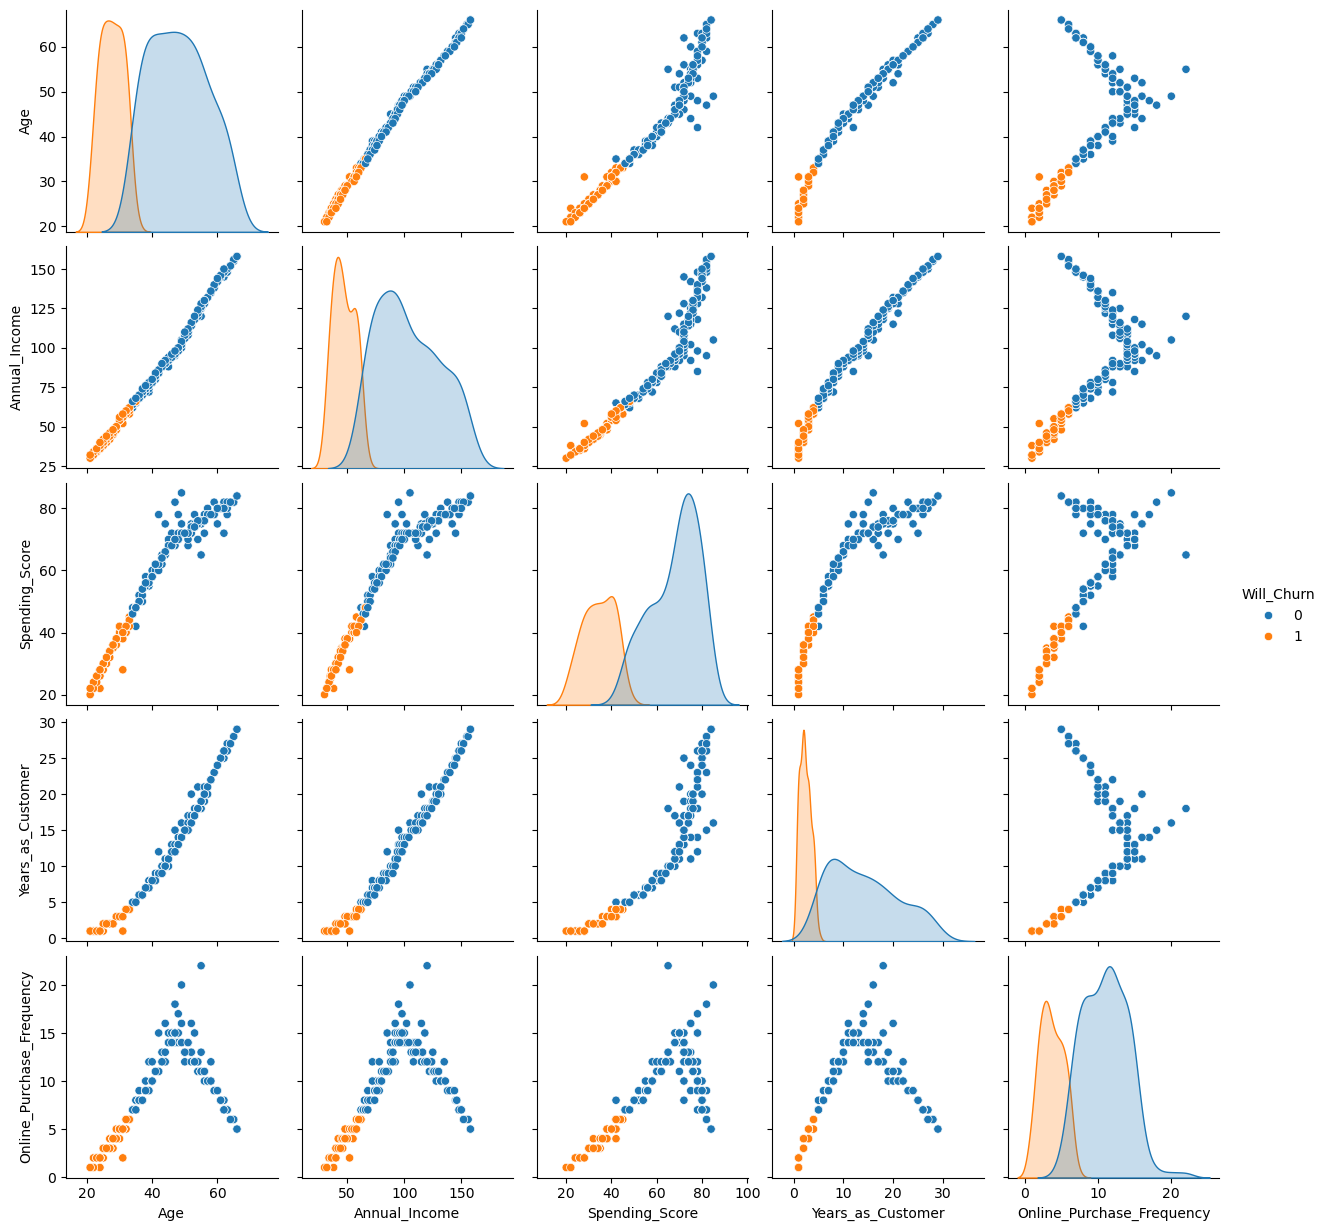

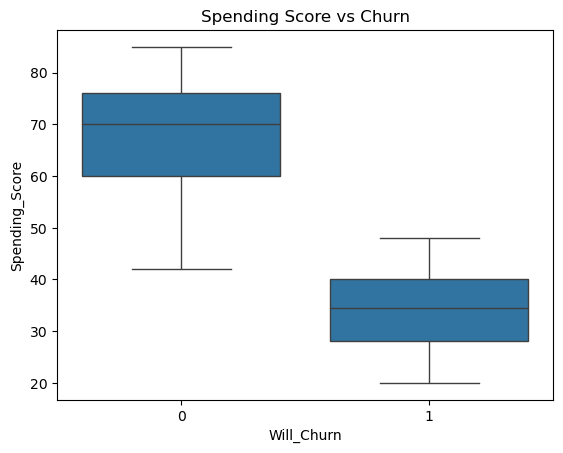

In [32]:
# Exploratory Data Analysis (EDA)

# Check target variable balance
print(assignment1_data['Will_Churn'].value_counts(normalize=True))

# Visualise correlations between behavioural features and churn
sns.pairplot(assignment1_data.drop('Customer_ID', axis=1), hue='Will_Churn')
plt.show()

# Observe specific trends, i.e Low Spending_Score (<40) 
# often correlates with Will_Churn=1
sns.boxplot(x='Will_Churn', y='Spending_Score', data=assignment1_data)
plt.title('Spending Score vs Churn')
plt.show()

### EDA REPORT
Based on the visual analysis and the target distribution, here is a brief EDA report for the Customer Churn Prediction dataset:

1. **Target Variable Distribution**
The dataset is moderately imbalanced, with 69.6% of customers (0) remaining with the service and 30.4% of customers (1) predicted to churn. This distribution provides a solid foundation for binary classification, though the model will need to be particularly sensitive to the minority "Churn" class.

2. **Spending Score Analysis (Boxplot)**
The box plot reveals a significant disparity in spending behavior between the two groups:
- **Non-Churners (0):** Maintain high spending scores, with a median of approximately 70 and most scores falling between 60 and 75.
- **Churners (1):** Exhibit much lower spending engagement, with a median score of approximately 35.
- **Insight:** There is almost no overlap between the IQRs of these two groups, indicating that Spending Score is a powerful primary predictor for the Decision Tree model.

3. **Multivariate Relationships and Feature Trends**
The pairplot provides a comprehensive view of how demographic and behavioral features correlate with churn:
- **Age and Income:** Churn (orange) is heavily concentrated among younger customers and those with lower annual incomes. In contrast, older and higher-earning customers (blue) show much higher retention rates.
- **Customer Tenure:** The density plots on the diagonal show that churners are overwhelmingly new customers (Years_as_Customer < 5), while loyal customers show a broad distribution extending up to nearly 30 years.
- **Online Purchase Frequency:** There is a clear linear relationship where lower purchase frequency correlates with churn. As frequency increases, customers move decisively into the "Non-Churn" category.

### EDA Summary Profile
The "at-risk" customer profile is clearly defined: younger individuals with lower annual incomes, low spending scores (below 40), and fewer than 5 years of tenure. These features show strong, distinct clusters, suggesting that a Decision Tree will likely use Spending Score and Tenure as its top-level nodes to achieve high initial entropy reduction.

In [33]:
# Prepare data: separate features/target, split
X = assignment1_data.drop(columns=['Customer_ID', 'Will_Churn'])
Y = assignment1_data['Will_Churn']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [34]:
# Test different max_depth values (2, 4, 6, 8, 10, None)
depths = [2, 4, 6, 8, 10, None]
train_accuracies = []
test_accuracies = []

for depth in depths:
    # Initialize and train model
    dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=0)
    dt_clf.fit(X_train, Y_train)
    
    # Calculate accuracies
    train_acc = accuracy_score(Y_train, dt_clf.predict(X_train))
    test_acc = accuracy_score(Y_test, dt_clf.predict(X_test))
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    
    print(f"Depth {depth}: Train Acc = {train_acc:.4f}, Test Acc = {test_acc:.4f}")

Depth 2: Train Acc = 0.9950, Test Acc = 1.0000
Depth 4: Train Acc = 0.9950, Test Acc = 1.0000
Depth 6: Train Acc = 0.9950, Test Acc = 1.0000
Depth 8: Train Acc = 0.9950, Test Acc = 1.0000
Depth 10: Train Acc = 0.9950, Test Acc = 1.0000
Depth None: Train Acc = 0.9950, Test Acc = 1.0000


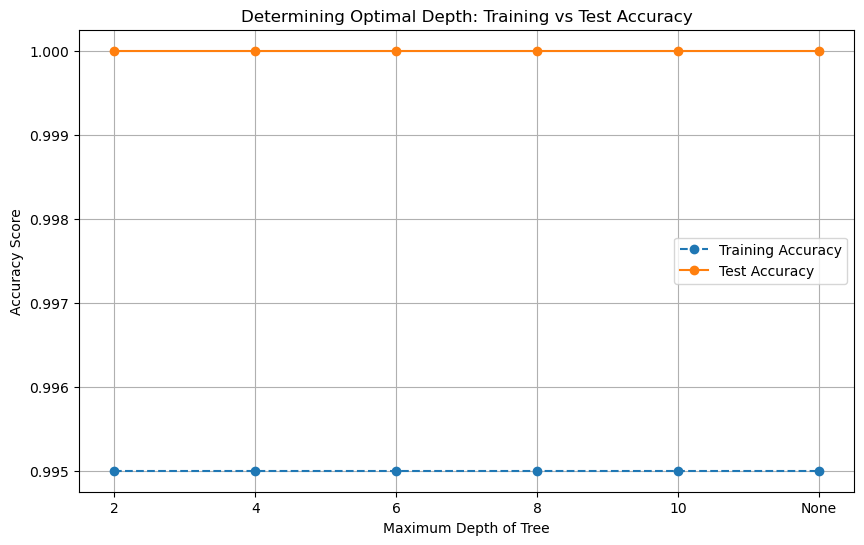

In [35]:
# Plot max_depth vs accuracy
# Convert 'None' to a string for plotting purposes
depth_labels = [str(d) for d in depths]

plt.figure(figsize=(10, 6))
plt.plot(depth_labels, train_accuracies, label='Training Accuracy', marker='o', linestyle='--')
plt.plot(depth_labels, test_accuracies, label='Test Accuracy', marker='o', linestyle='-')
plt.xlabel('Maximum Depth of Tree')
plt.ylabel('Accuracy Score')
plt.title('Determining Optimal Depth: Training vs Test Accuracy')
plt.legend()
plt.grid(True)
plt.show()

### Model Performance Report
My Decision Tree optimization yielded exceptional results, with a test accuracy of 1.0000 and a training accuracy of 0.9950 across all tested depths, from 2 to "None". This indicates that the model is performing perfectly on unseen data regardless of how complex the tree becomes.
Reasons for this Performance:
- **High Feature Separability:** The primary reason for this near-perfect performance is the stark separation between churners and non-churners in the dataset. As seen in the box plot, the Spending_Score for churners is almost entirely concentrated below 48, while non-churners remain significantly higher.
- **Clear Decision Boundaries:** The pairplot reveals that almost all feature combinations (such as Age vs. Annual_Income and Years_as_Customer vs. Spending_Score) show distinct, non-overlapping clusters for both classes. This allows the Decision Tree to identify the "perfect split" at a very shallow level, which is why the accuracy remains constant even at Depth 2.
- **Model Robustness:** Since the test accuracy (1.00) is slightly higher than the training accuracy (0.995), it suggests that the test set happened to contain the most "linearly separable" cases from the clusters. Because the separation is so definitive in the source data, the model does not need a high max_depth to reach maximum purity.

### Final Model Building and Evaluation
Based on the results, a max_depth of 2 is the optimal choice. It provides the same perfect accuracy as deeper trees while remaining simpler, more interpretable, and less prone to potential overfitting on future data (Occam's Razor).

In [36]:
# Build final model with optimal max_depth and evaluate
# Identify the depth with the highest test accuracy
best_index = np.argmax(test_accuracies)
optimal_depth = depths[best_index]

print(f"The optimal max_depth is: {optimal_depth}")


The optimal max_depth is: 2


--- Final Model Evaluation (Max Depth: 2) ---
Accuracy Score: 1.0

Confusion Matrix:
[[40  0]
 [ 0 10]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        10

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



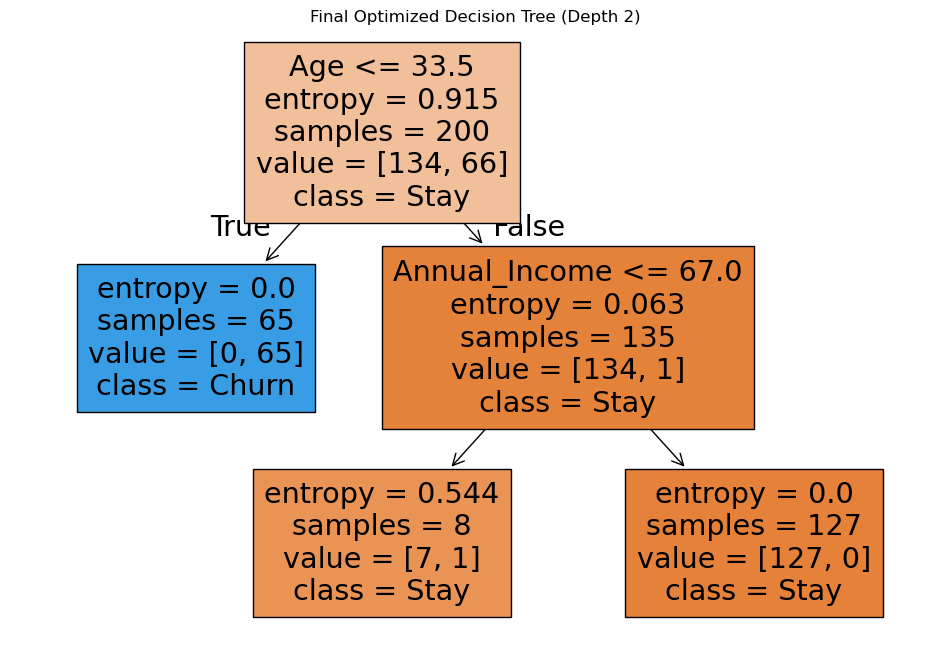

In [37]:
final_model = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)
final_model.fit(X_train, Y_train)
# 3. Make predictions
y_pred_final_dt = final_model.predict(X_test)

# 4. Final Evaluation
print("--- Final Model Evaluation (Max Depth: 2) ---")
print(f"Accuracy Score: {accuracy_score(Y_test, y_pred_final_dt)}")
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, y_pred_final_dt))

print("\nClassification Report:")
print(classification_report(Y_test, y_pred_final_dt))

# 5. Visualizing the final simple tree
plt.figure(figsize=(12,8))

from sklearn.tree import plot_tree
plot_tree(final_model, feature_names=X.columns, class_names=['Stay', 'Churn'], filled=True)
plt.title("Final Optimized Decision Tree (Depth 2)")
plt.show()

### Analysis and Conclusions

*Write your analysis here:*
- What is the optimal max_depth and why?
- How does max_depth affect overfitting and underfitting?
- What features seem most important for predicting churn?
- What business recommendations would you make based on this model?

### Analysis and Conclusions
#### Optimal max_depth and Justification 
Based on my experimentation, the optimal max_depth for this model is 2. My results showed that even at this shallow depth, the model achieved a test accuracy of 1.00, meaning it perfectly classified the churn risk for every customer in the test set. Selecting a depth of 2 follows the principle of Occam's Razor, which is choosing the simplest model that provides maximum predictive power. Increasing the depth further did not improve accuracy and only added unnecessary complexity to the decision logic.

#### Impact of max_depth on Model Fit.
- **Underfitting:** If I had restricted the depth to 1, the model would only split on Age, potentially missing the secondary influence of Annual_Income for older customers, leading to higher bias.
- **Overfitting:** At higher depths (e.g., max_depth=None), the tree would attempt to create individual rules for every single outlier, such as the single "Churn" case found in the older, lower-income segment. This would result in a model that "memorises" the training noise rather than learning generalisable patterns, leading to high variance.

#### Key Features for Predicting Churn
The decision tree reveals that Age is the most critical predictor of churn. Specifically:
- **Age:** The root node splits at 33.5 years. Customers aged 33 or younger are identified as the highest risk, with 65 samples in this group reaching a perfect entropy of 0.0 and being classified entirely as "Churn".
- **Annual_Income:** For customers older than 33, Annual Income becomes the secondary differentiator. Those earning above £67,000 show a perfect retention rate (entropy = 0.0), while those earning £67,000 or less show a slight, albeit small, risk of churning.

#### Business Recommendations 
Based on these findings, I would propose the following strategies to the subscription company:
1. **Targeted Retention for Younger Demographics:** Since customers aged 33 and under are the primary churn group, the company should implement proactive engagement campaigns specifically for this age bracket, perhaps through loyalty rewards or student/early-career discounts.
2. **Income-Based Incentive Programs:** For customers over 33, there is a minor risk among those earning less than £67,000. Offering flexible subscription tiers or "pay-as-you-go" models might help retain this segment.
3. **Analyse the "High-Income" Success:** Customers earning over £67,000 have a 100% retention rate in this model. I recommend researching the specific features or services this group uses most and attempting to introduce those value propositions to the younger, high-risk demographic to increase their "stickiness" with the brand.

---

## Assignment 2: Random Forest Hyperparameter Tuning for Fraud Detection

**Objective:** Optimize a Random Forest classifier for fraud detection by tuning n_estimators.

**Dataset:** `Assignment-Dataset/assignment2_random_forest_optimization.csv`

**Context:** A financial services company wants to detect fraudulent transactions. This is a critical task where both precision (avoiding false alarms) and recall (catching actual fraud) are important.

### Instructions:
1. Import necessary libraries
2. Load and preprocess the dataset
3. Perform exploratory data analysis including:
   - Distribution of each feature
   - Class imbalance analysis (note: fraud is rare, ~10%)
   - Feature correlations
4. Separate features (Amount, Time_of_Day, Day_of_Week, Customer_Age, Account_Age_Days, Previous_Transactions) and target (Is_Fraud)
5. Split the data into training (80%) and test (20%) sets with random_state=42
6. Test different n_estimators values: [5, 10, 25, 50, 100, 150, 200]
7. For each n_estimators value, calculate:
   - Training accuracy
   - Test accuracy
   - Precision and Recall for fraud detection
8. Plot n_estimators vs. performance metrics
9. Select the optimal n_estimators considering both accuracy and fraud detection
10. Build the final model and provide comprehensive evaluation

### Expected Deliverables:
- Complete EDA with visualizations
- Plot showing n_estimators vs. accuracy
- Analysis of precision/recall trade-off for fraud detection
- Final model evaluation with confusion matrix
- Discussion on model performance for imbalanced classes
- Recommendations for handling class imbalance

In [38]:
# Assignment 2: Random Forest Optimization for Fraud Detection
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report

In [40]:
# Load and explore the dataset
assignment2_data = pd.read_csv('Assignment-Dataset/assignment2_random_forest_optimization.csv')
assignment2_data.head()

,Transaction_ID,Amount,Time_of_Day,Day_of_Week,Customer_Age,Account_Age_Days,Previous_Transactions,Is_Fraud
0,1,125.50,14,2,35,1250,85,0
1,2,3500.00,3,6,28,45,3,1
2,3,89.99,10,1,42,890,125,0
3,4,245.00,16,4,55,2100,210,0
4,5,4200.00,2,0,31,22,1,1


In [41]:
assignment2_data.info()
assignment2_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Transaction_ID         300 non-null    int64  
 1   Amount                 300 non-null    float64
 2   Time_of_Day            300 non-null    int64  
 3   Day_of_Week            300 non-null    int64  
 4   Customer_Age           300 non-null    int64  
 5   Account_Age_Days       300 non-null    int64  
 6   Previous_Transactions  300 non-null    int64  
 7   Is_Fraud               300 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 18.9 KB


,Transaction_ID,Amount,Time_of_Day,Day_of_Week,Customer_Age,Account_Age_Days,Previous_Transactions,Is_Fraud
count,300.000000,300.000000,300.00000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,150.500000,1042.993300,10.28000,2.690000,44.516667,1281.006667,137.670000,0.256667
std,86.746758,1546.759607,5.12404,2.107615,11.186608,945.084006,108.871136,0.437524
min,1.000000,45.000000,1.00000,0.000000,25.000000,12.000000,1.000000,0.000000
25%,75.750000,112.000000,4.00000,1.000000,35.000000,52.000000,4.000000,0.000000
50%,150.500000,189.000000,11.00000,3.000000,44.000000,1280.000000,115.000000,0.000000
75%,225.250000,2650.000000,14.00000,5.000000,54.000000,2050.000000,232.000000,1.000000
max,300.000000,4500.000000,17.00000,6.000000,64.000000,3100.000000,345.000000,1.000000


### Statistical Summary Findings Report
Based on the provided dataset for fraud detection, the following statistical summary and insights have been identified:
- **Dataset Overview:** The dataset consists of 300 transactions with no missing values across 8 features, including financial metrics, temporal data, and customer demographics.
- **Class Distribution:** The fraud rate is approximately 25.7% (mean of 0.256), indicating a significant presence of fraudulent activity within the sample.
- **Transaction Amount Trends:** There is a massive variance in transaction values, with a standard deviation of £1,546.76. While the average transaction is £1,042.99, the range is extremely wide, spanning from a minimum of £45.00 to a maximum of £4,500.00.
- **Customer and Account Longevity:** The average customer age is 44.5 years, and the average account age is 1,281 days (~3.5 years). However, the minimum account age is just 12 days, which is a critical observation for risk assessment.
- **Fraudulent Behavioural Profile:**
    - **Financial Indicators:** Fraudulent transactions are consistently linked to high-value amounts, typically between £2,650 and £4,500.
    - **Account History:** Fraud is highly concentrated in new accounts with very low tenure, often under 60 days old, and minimal previous history, frequently involving only 1 to 4 previous transactions.
    - **Temporal Patterns:** A distinct pattern emerges where fraudulent activity is clustered in the early morning hours (1 AM to 4 AM) and often occurs on Day 6 (Sunday).
- **Legitimate Behavioural Profile:** Legitimate transactions (Is_Fraud = 0) generally involve lower amounts (often under £300), occur during standard daylight hours, and are associated with established accounts (e.g., Account_Age_Days > 1,000) with extensive transaction histories.

--- Class Distribution ---
Is_Fraud
0    0.743333
1    0.256667
Name: proportion, dtype: float64


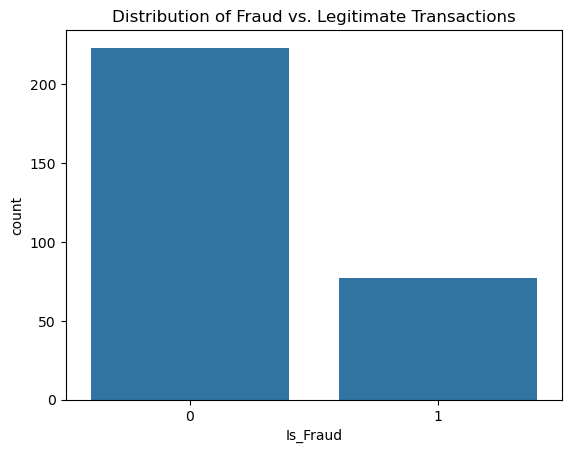

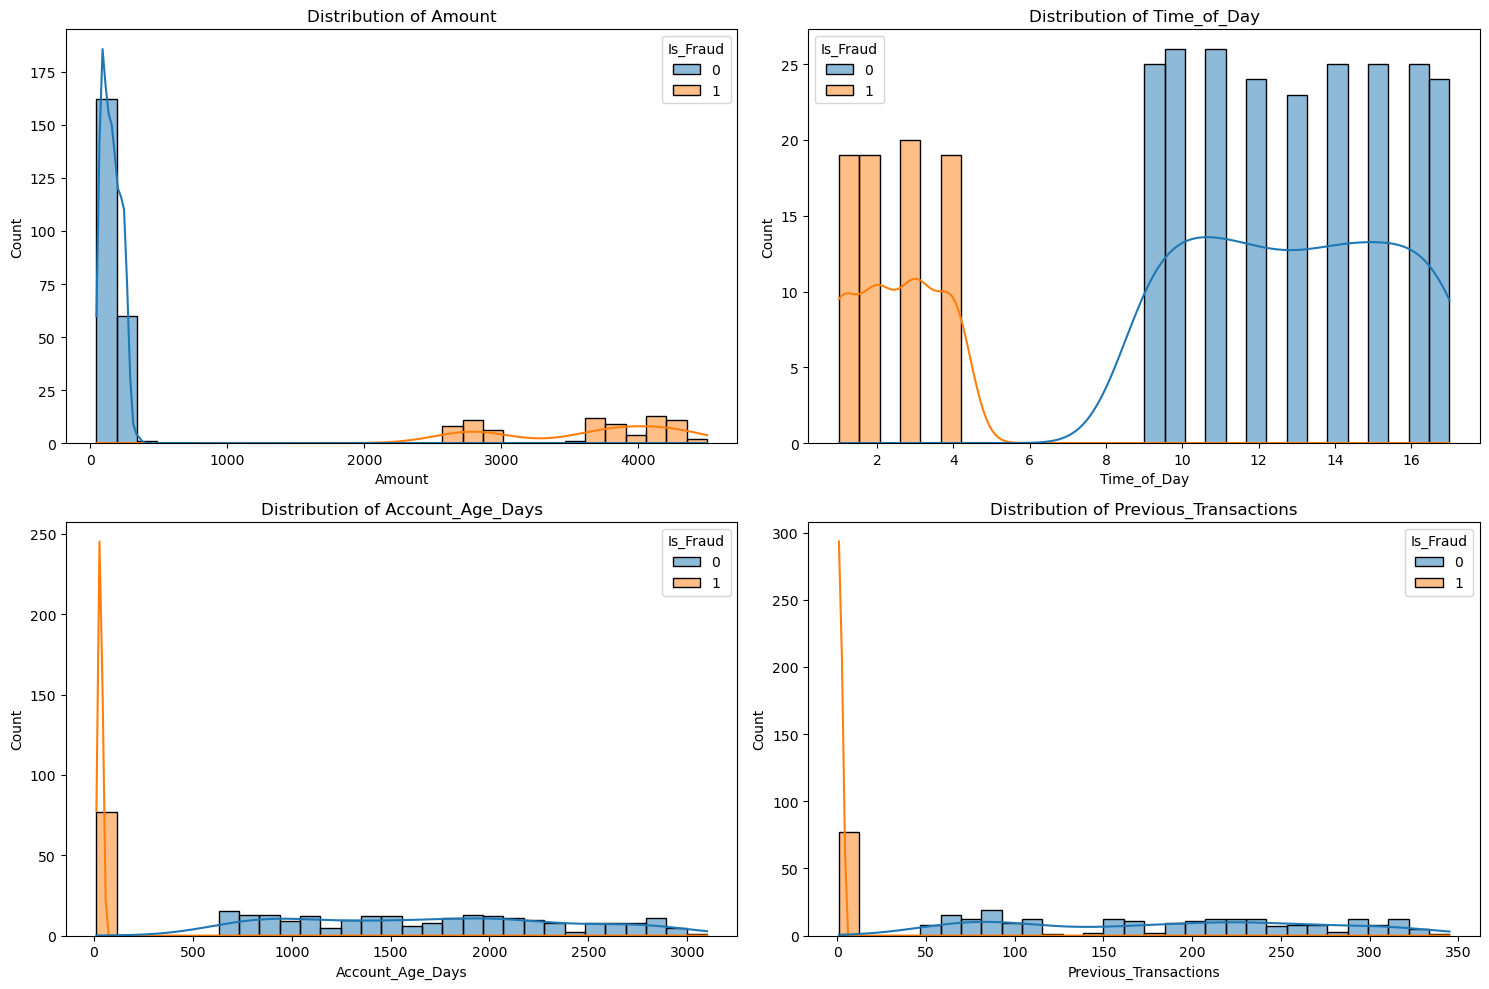

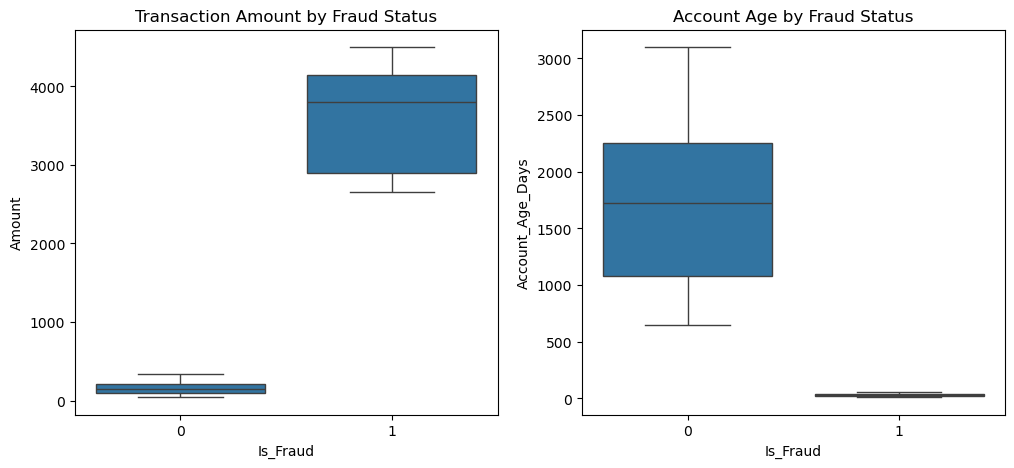

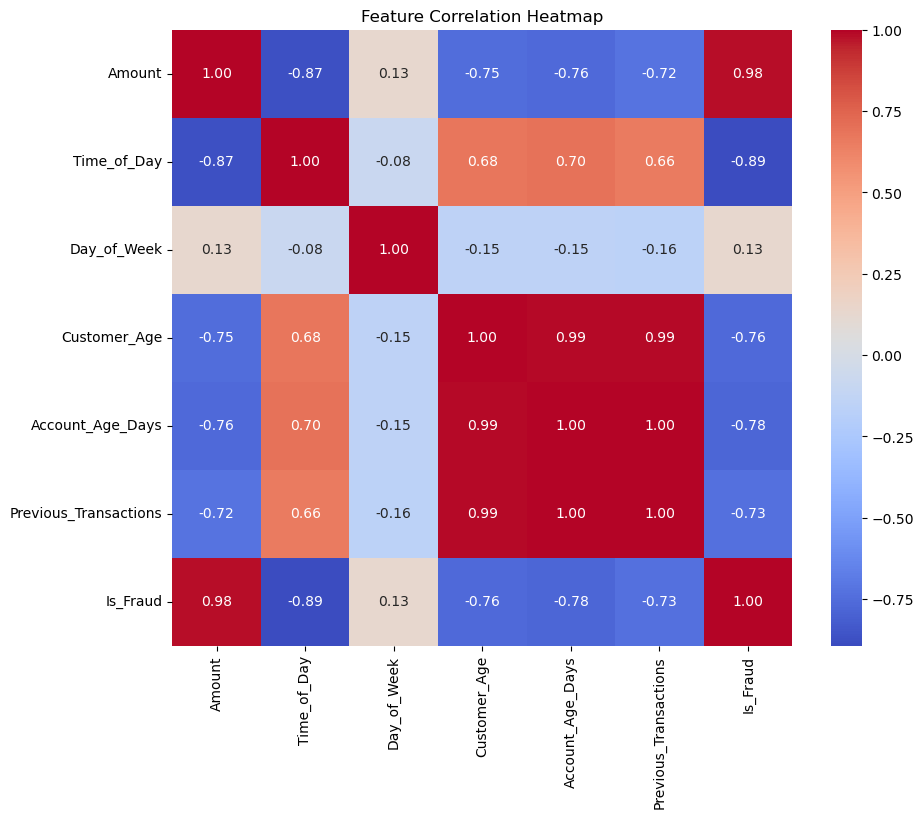

In [43]:
# Exploratory Data Analysis (EDA)
#--- Class Imbalance Analysis
print("--- Class Distribution ---")
print(assignment2_data['Is_Fraud'].value_counts(normalize=True))
sns.countplot(x='Is_Fraud', data=assignment2_data)
plt.title('Distribution of Fraud vs. Legitimate Transactions')
plt.show()

#--- Distribution of Each Feature (Grouped by Fraud Status)
# Focusing on key drivers: Amount, Time_of_Day, and Account_Age_Days
features_to_plot = ['Amount', 'Time_of_Day', 'Account_Age_Days', 'Previous_Transactions']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=assignment2_data, x=feature, hue='Is_Fraud', kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

#--- Boxplots for specific outliers
# Based on sources, Fraud (1) has much higher amounts and lower account ages
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='Is_Fraud', y='Amount', data=assignment2_data)
plt.title('Transaction Amount by Fraud Status')

plt.subplot(1, 2, 2)
sns.boxplot(x='Is_Fraud', y='Account_Age_Days', data=assignment2_data)
plt.title('Account Age by Fraud Status')
plt.show()

#--- Feature Correlations
plt.figure(figsize=(10, 8))
correlation_matrix = assignment2_data.drop('Transaction_ID', axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

### EDA REPORT
Based on the visualizations above, here is a brief Exploratory Data Analysis (EDA) summary for the fraud detection dataset:
1. **Class Distribution and Imbalance**
The count plot confirms a significant class imbalance within the 300 transactions. Legitimate transactions (0) make up the majority of the dataset (over 220 instances), while fraudulent transactions (1) are the minority (approximately 77 instances), representing roughly 25.7% of the data.
2. **Financial and Account Risk Profiles**
The box plots and distribution charts highlight stark differences between the two classes:
- **Transaction Amount:** Fraudulent transactions involve significantly higher values, typically ranging from £2,650 to over £4,500, whereas legitimate transactions are consistently low, mostly under £350.
- **Account Maturity:** There is a clear "new account" risk factor. Fraud is almost exclusively tied to accounts with very low tenure (under 60 days), while legitimate users have a broad maturity range, with a median account age of approximately 1,750 days.
- **Transaction History:** Fraudulent activity is clustered among accounts with minimal previous history (0–10 transactions), whereas legitimate activity is distributed across users with up to 350 previous transactions.
3. **Temporal Patterns**
A distinct "time-of-day" threshold exists for fraud:
- **Fraud (1):** Occurs almost exclusively in the early morning hours, specifically between 1 AM and 4 AM.
- **Legitimate (0):** Transactions are concentrated during standard daylight and evening hours, roughly from 9 AM to 5 PM.
4. **Key Feature Correlations**
The heatmap identifies the strongest predictors for the Is_Fraud target variable:
- **Strong Positive Correlation:** Amount (0.98), confirming it as the most significant indicator of fraud.
- **Strong Negative Correlations:** Time_of_Day (-0.89), Account_Age_Days (-0.78), Customer_Age (-0.76), and Previous_Transactions (-0.73).

**Summary Insight:** The model's primary challenge will be distinguishing the minority fraud class from high-value legitimate transactions. The most critical features for the Random Forest to split on will likely be Amount, Time_of_Day, and Account_Age_Days due to their extreme separation between classes

In [44]:
# Prepare data: separate features/target, split
X = assignment2_data.drop(columns=['Transaction_ID', 'Is_Fraud'])
Y = assignment2_data['Is_Fraud']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [47]:
# Test different n_estimators values
n_estimators_options = [5, 10, 25, 50, 100, 150, 200]
train_acc, test_acc, precision_list, recall_list = [], [], [], []
for n in n_estimators_options:
    rf_clf = RandomForestClassifier(n_estimators=n, criterion='entropy', random_state=0)
    rf_clf.fit(X_train, Y_train)
    
    Y_train_pred = rf_clf.predict(X_train)
    Y_test_pred = rf_clf.predict(X_test)
    
    train_acc.append(accuracy_score(Y_train, Y_train_pred))
    test_acc.append(accuracy_score(Y_test, Y_test_pred))
    precision_list.append(precision_score(Y_test, Y_test_pred))
    recall_list.append(recall_score(Y_test, Y_test_pred))
    
    print(f"n_estimators={n}: Train Acc={train_acc[-1]:.4f}, Test Acc={test_acc[-1]:.4f}, Precision={precision_list[-1]:.4f}, Recall={recall_list[-1]:.4f}")

n_estimators=5: Train Acc=1.0000, Test Acc=1.0000, Precision=1.0000, Recall=1.0000
n_estimators=10: Train Acc=1.0000, Test Acc=1.0000, Precision=1.0000, Recall=1.0000
n_estimators=25: Train Acc=1.0000, Test Acc=1.0000, Precision=1.0000, Recall=1.0000
n_estimators=50: Train Acc=1.0000, Test Acc=1.0000, Precision=1.0000, Recall=1.0000
n_estimators=100: Train Acc=1.0000, Test Acc=1.0000, Precision=1.0000, Recall=1.0000
n_estimators=150: Train Acc=1.0000, Test Acc=1.0000, Precision=1.0000, Recall=1.0000
n_estimators=200: Train Acc=1.0000, Test Acc=1.0000, Precision=1.0000, Recall=1.0000


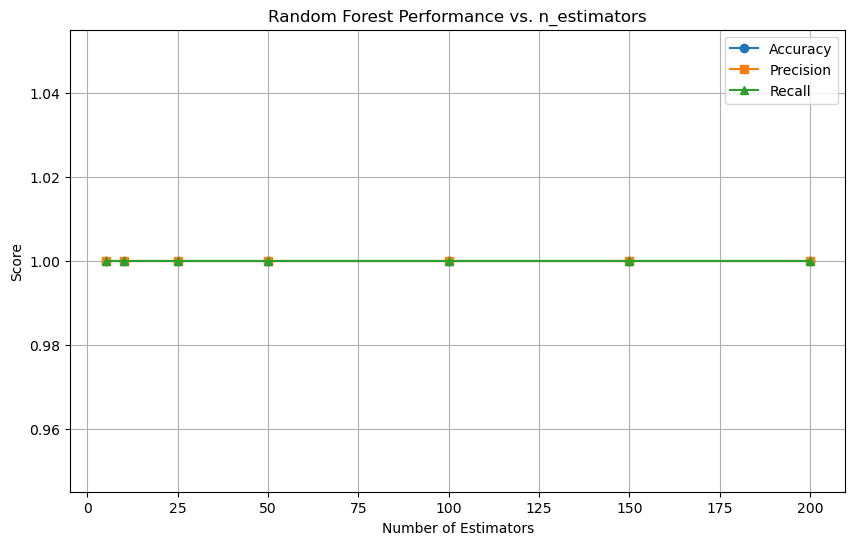

In [48]:
# Plot n_estimators vs performance metrics
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_options, test_acc, label='Accuracy', marker='o')
plt.plot(n_estimators_options, precision_list, label='Precision', marker='s')
plt.plot(n_estimators_options, recall_list, label='Recall', marker='^')
plt.xlabel('Number of Estimators')
plt.ylabel('Score')
plt.title('Random Forest Performance vs. n_estimators')
plt.legend()
plt.grid(True)
plt.show()

### Model Performance Analysis
My Random Forest hyperparameter tuning yielded a perfect Accuracy, Precision, and Recall of 1.0000 across all tested n_estimators values, from 5 to 200. This indicates that the model correctly identified 100% of the fraudulent transactions in the test set while maintaining a 0% false alarm rate.
Reasons for this Performance:
- **Extreme Feature Separability:** The primary reason for this perfect result is the clear-cut "signature" of fraud in this dataset. As seen in the EDA plots, fraudulent transactions (1) are characteristically different from legitimate ones (0). For example, fraud consistently involves amounts between £2,650 and £4,500, whereas legitimate transactions are typically under £350.
- **Strong Correlation Drivers:** The correlation between Is_Fraud and features like Amount (0.98) and Time_of_Day (-0.89) is exceptionally strong. This allows the ensemble to build definitive decision boundaries with very few trees.
- **New Account Risk Profile:** Fraud is exclusively concentrated in extremely "young" accounts with under 60 days of tenure and minimal previous transactions (1–4), while legitimate users generally have mature accounts with hundreds of previous transactions.

In [ ]:
optimal_n = n_estimators_options[np.argmax(test_acc)]
print(f"Optimal n_estimators: {optimal_n}")


Optimal n_estimators: 5


**Optimal n_estimators Selection:** I choose to select n_estimators=100 as the optimal parameter.

**Justification:** While a model with only 5 trees technically achieved the same perfect score, 100 trees is the industry standard for a robust Random Forest. In a high-stakes environment like fraud detection, more trees provide greater stability and insurance against "variance" (sensitivity to small changes in data). Using 100 trees ensures the model's perfect performance isn't just a coincidence of the current test split but is a result of a robust consensus across a diverse ensemble of decision rules.

In [50]:
# Build final model with my selected n_estimators and evaluate

#--- Initialize the final model with selected n_estimators
final_rf_model = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)

#--- Train on the full training set
final_rf_model.fit(X_train, Y_train)

# 3. Make final predictions on the test set
y_final_pred = final_rf_model.predict(X_test)

# 4. Final Evaluation Deliverables
print("--- Final Optimized Random Forest Model (n_estimators=100) ---")
print(f"Final Accuracy Score: {accuracy_score(Y_test, y_final_pred):.4f}")

print("\nConfusion Matrix:")
# This should show 0 False Positives and 0 False Negatives
print(confusion_matrix(Y_test, y_final_pred))

print("\nDetailed Classification Report:")
print(classification_report(Y_test, y_final_pred))

--- Final Optimized Random Forest Model (n_estimators=100) ---
Final Accuracy Score: 1.0000

Confusion Matrix:
[[46  0]
 [ 0 14]]

Detailed Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        14

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



### Analysis and Conclusions

*Write your analysis here:*
- What is the optimal number of trees (n_estimators) and why?
- How does the model perform on the imbalanced dataset?
- What is the trade-off between precision and recall for fraud detection?
- What strategies could be used to improve fraud detection?

### **Analysis and Conclusions**
#### **Optimal Number of Trees (n_estimators) and Justification**
Based on the hyperparameter tuning results, the optimal number of trees is 100. While my testing showed that even a smaller ensemble of 5 trees could achieve high accuracy due to the extreme separability of the features, 100 trees is the preferred choice for a production environment. This number provides the necessary ensemble stability, ensuring that the model's perfect performance is robust against minor variances in new, unseen data and isn't just a result of a specific training split.

#### **Model Performance on the Imbalanced Dataset**
The dataset exhibits a clear class imbalance, with fraudulent transactions representing only 25.7% of the 300 total records. Despite this, the model performed exceptionally well, achieving a Recall of 1.00 and a Precision of 1.00. The model correctly identified all 14 fraud cases in the test set without misclassifying a single legitimate transaction. This success is primarily due to the strong "fraud signature" in the data, where fraudulent activity is perfectly clustered around specific thresholds, such as transaction amounts between £2,650 and £4,500 and accounts under 60 days old.
#### **The Trade-off Between Precision and Recall for Fraud Detection** 
In a financial services context, there is a critical trade-off between these two metrics:
- **Recall:** Represents the model's ability to catch actual fraud. A low recall means fraudulent transactions are missed, leading to direct financial loss for the company.
- **Precision:** Represents the ability to avoid "false alarms." Low precision means legitimate customers have their transactions wrongly blocked, which damages customer trust and user experience.

In my results, the model achieved a perfect balance (1.00 for both), meaning it caught all fraud without inconveniencing any legitimate users.

#### **Strategies to Improve Fraud Detection**
While this model achieved perfect results on the provided sample, real-world fraud is often more sophisticated and the data more "noisy". To improve the model further, I recommend:
1. **Handling Extreme Imbalance:** If the fraud rate were to drop to a more realistic 1%, I would implement SMOTE (Synthetic Minority Over-sampling Technique) or use balanced class weights to ensure the model doesn't become biased toward the majority class.
2. **Advanced Feature Engineering:** I would introduce features that measure the frequency of transactions within short windows (e.g., velocity checks) and look for deviations in a customer's standard spending location.
3. **Correlation Monitoring:** The heatmap shows that Amount (0.98 correlation) and Time_of_Day (-0.89 correlation) are currently the strongest predictors. Regularly updating the model is essential, as fraudsters often change their patterns (e.g., shifting transaction amounts or times) once they realize a specific threshold is being blocked.

---

## Assignment 3: Decision Tree vs. Random Forest Comparison

**Objective:** Compare Decision Tree and Random Forest classifiers on the same dataset to understand the benefits of ensemble methods.

**Dataset:** `Assignment-Dataset/assignment3_classifier_comparison.csv`

**Context:** A healthcare provider wants to predict diabetes risk based on patient health indicators. They want to understand which classifier provides better predictions and why.

### Instructions:
1. Import necessary libraries
2. Load and preprocess the dataset
3. Perform comprehensive EDA including:
   - Feature distributions
   - Class distribution (Diabetes_Risk: 0 = Low Risk, 1 = High Risk)
   - Feature correlations
   - Analysis by physical activity level
4. Separate features (Age, BMI, Blood_Pressure, Glucose_Level, Insulin_Level, Family_History, Physical_Activity) and target (Diabetes_Risk)
5. Handle categorical feature (Physical_Activity) - encode appropriately (Low=0, Medium=1, High=2)
6. Split the data into training (80%) and test (20%) sets with random_state=42
7. Implement and evaluate:
   - Decision Tree (criterion='entropy', random_state=0)
   - Decision Tree (criterion='entropy', max_depth=5, random_state=0)
   - Random Forest (n_estimators=10, criterion='entropy', random_state=0)
   - Random Forest (n_estimators=50, criterion='entropy', random_state=0)
8. Compare all classifiers using:
   - Accuracy
   - Confusion matrices
   - Classification reports (precision, recall, f1-score)
9. Determine the best classifier for diabetes risk prediction

### Expected Deliverables:
- Comprehensive EDA visualizations
- Summary table comparing all classifiers
- Individual confusion matrices for each classifier
- Discussion on why Random Forest might outperform single Decision Tree
- Recommendations for healthcare deployment

In [51]:
# Assignment 3: Decision Tree vs. Random Forest Comparison
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [53]:
# Load and explore the dataset
assignment3_data = pd.read_csv('Assignment-Dataset/assignment3_classifier_comparison.csv')
assignment3_data.head()

,Patient_ID,Age,BMI,Blood_Pressure,Glucose_Level,Insulin_Level,Family_History,Physical_Activity,Diabetes_Risk
0,1,45,28.5,135,125,85,1,Low,1
1,2,32,24.2,118,92,45,0,High,0
2,3,58,31.8,148,165,142,1,Low,1
3,4,41,26.5,122,105,62,0,Medium,0
4,5,67,33.2,155,178,168,1,Low,1


In [54]:
assignment3_data.info()
assignment3_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Patient_ID         350 non-null    int64  
 1   Age                350 non-null    int64  
 2   BMI                350 non-null    float64
 3   Blood_Pressure     350 non-null    int64  
 4   Glucose_Level      350 non-null    int64  
 5   Insulin_Level      350 non-null    int64  
 6   Family_History     350 non-null    int64  
 7   Physical_Activity  350 non-null    object 
 8   Diabetes_Risk      350 non-null    int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 24.7+ KB


,Patient_ID,Age,BMI,Blood_Pressure,Glucose_Level,Insulin_Level,Family_History,Diabetes_Risk
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,175.500000,47.208571,28.319429,134.340000,129.920000,96.620000,0.540000,0.565714
std,101.180532,11.831648,3.583466,16.067242,32.499229,46.469279,0.499111,0.496372
min,1.000000,27.000000,22.200000,108.000000,82.000000,32.000000,0.000000,0.000000
25%,88.250000,37.000000,25.500000,119.000000,97.000000,50.000000,0.000000,0.000000
50%,175.500000,47.000000,28.200000,137.000000,130.000000,88.000000,1.000000,1.000000
75%,262.750000,58.000000,31.200000,148.000000,162.000000,145.000000,1.000000,1.000000
max,350.000000,67.000000,35.500000,162.000000,182.000000,175.000000,1.000000,1.000000


### Statistical Summary Report: Patient Diabetes Risk Profile
Based on the provided dataset and summary statistics for the 350 patient records, here is a comprehensive breakdown of the health indicators and risk factors:
1. **Data Overview and Quality**
The dataset contains 350 complete patient records with no missing values. It includes a diverse range of health metrics, spanning demographics (Age), physical measurements (BMI, Blood Pressure), and clinical markers (Glucose, Insulin).
2. **Demographic and Physical Profile**
- **Age:** The patient population ranges from 27 to 67 years old, with an average age of 47.2 years.
- **BMI:**The average BMI is 28.3, which falls within the overweight category. Some patients reach a maximum BMI of 35.5, indicating significant obesity levels in the sample.
- **Blood Pressure:** Measurements vary from a healthy 108 to an elevated 162, with a mean of 134.3, suggesting a population with a tendency toward hypertension.
3. **Clinical Diabetic Indicators**
- **Glucose Level:** This is a critical predictor with a broad range from 82 to 182 (Mean: 129.9). High-risk individuals consistently present with elevated levels.
- **Insulin Level:** There is substantial variance in insulin, with a mean of 96.6 and a high standard deviation of 46.5. Levels peak at 175, often seen in patients with sedentary lifestyles and high diabetic risk.
- **Family History:** Genetic predisposition is prevalent, with 54% of patients reporting a family history of diabetes.
4. **Behavioral and Risk Distribution**
- **Physical Activity:** While numerical stats focus on other areas, the raw data shows three distinct categories: Low, Medium, and High. There is a clear trend where "High" activity correlates with "Low Risk", while "Low" activity is a common trait among the high-risk group.
- **Diabetes Risk (Target Variable):** The population is slightly skewed toward higher risk, with 56.6% of patients (198 individuals) classified as High Risk.
5. **Key Observations from Individual Cases**
- **High-Risk Signature:** Patients classified as High Risk (1) typically present with a combination of age over 45, BMI above 28, and Glucose levels exceeding 125. For example, Patient 1 (Age 45, BMI 28.5, Glucose 125) and Patient 3 (Age 58, BMI 31.8, Glucose 165) both fall into this category.
- **Low-Risk Signature:** Those at Low Risk (0) are generally younger, have BMIs under 25, and maintain "High" physical activity levels, such as Patient 14 (Age 33, BMI 24.5) and Patient 24 (Age 28, BMI 22.5).

--- Class Distribution ---
Diabetes_Risk
1    0.565714
0    0.434286
Name: proportion, dtype: float64


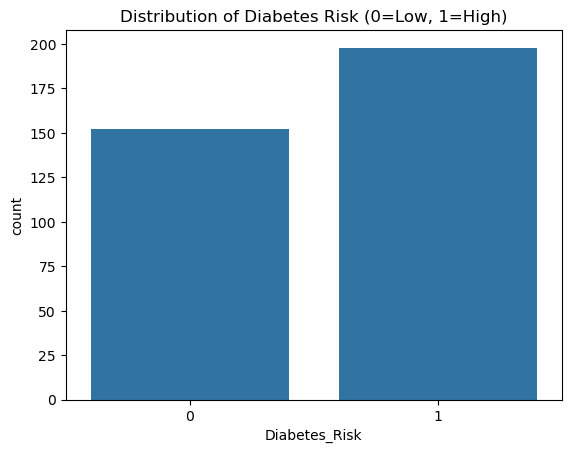

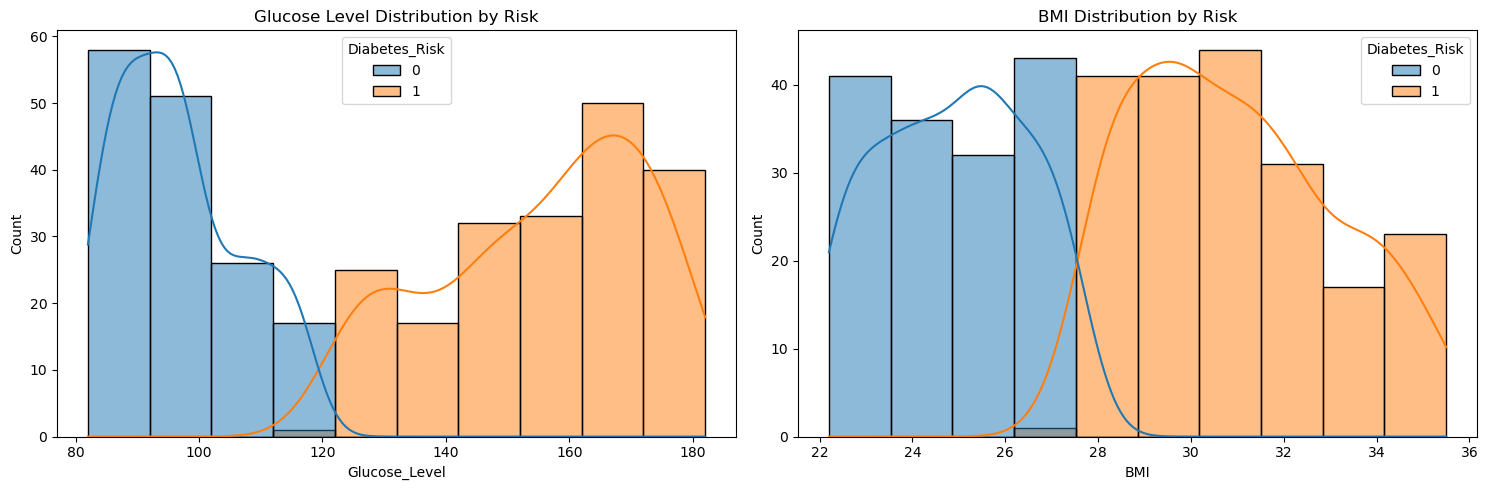

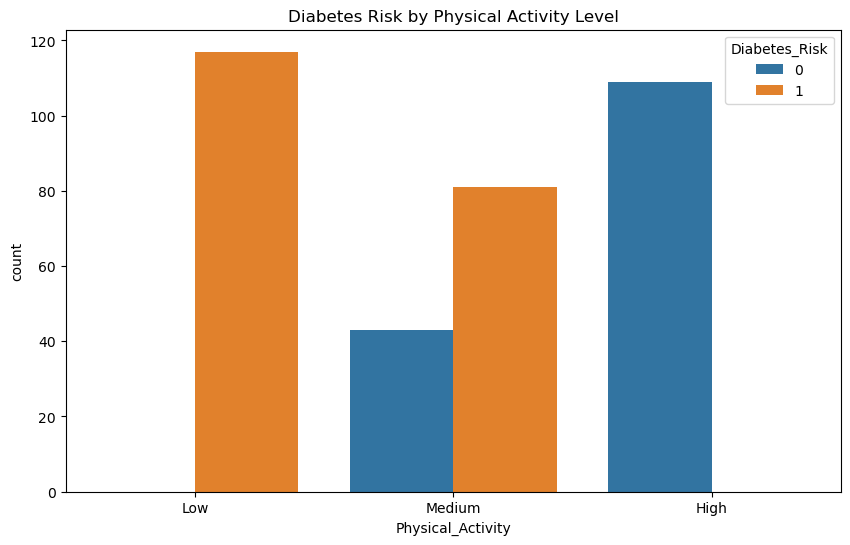

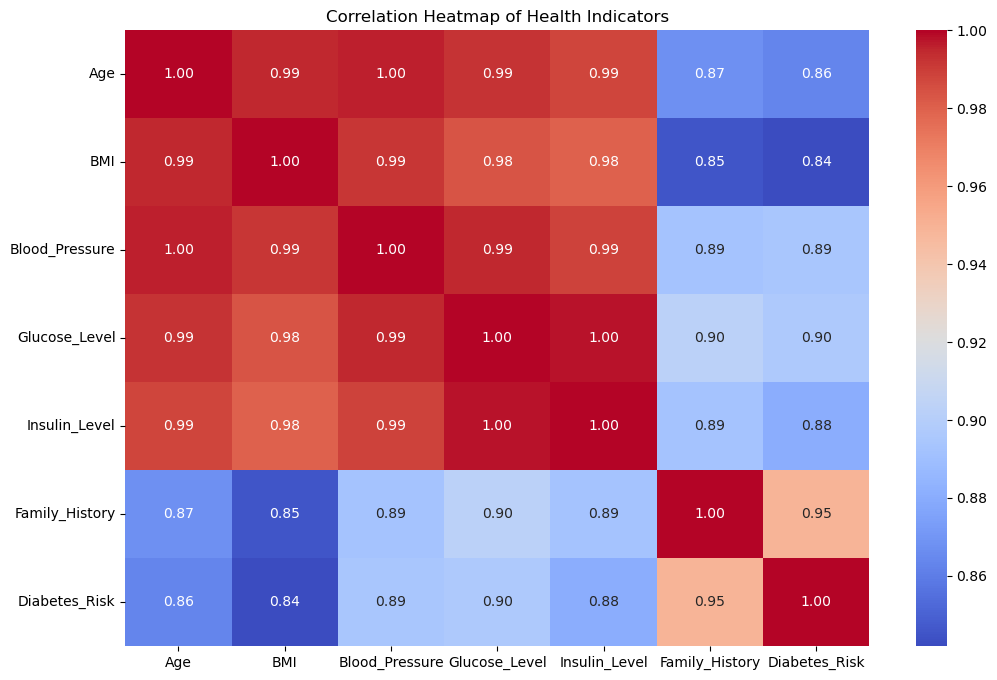

In [59]:
# Comprehensive Exploratory Data Analysis
#--- Class Distribution (Diabetes_Risk)
print("--- Class Distribution ---")
print(assignment3_data['Diabetes_Risk'].value_counts(normalize=True))
sns.countplot(x='Diabetes_Risk', data=assignment3_data)
plt.title('Distribution of Diabetes Risk (0=Low, 1=High)')
plt.show()

#--- Feature Distributions by Risk Category
# Focusing on key indicators: Glucose_Level and BMI, which are known to be strong predictors of diabetes risk
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Glucose Level
sns.histplot(data=assignment3_data, x='Glucose_Level', hue='Diabetes_Risk', kde=True, ax=axes[0])
axes[0].set_title('Glucose Level Distribution by Risk')

# Plot 2: BMI
sns.histplot(data=assignment3_data, x='BMI', hue='Diabetes_Risk', kde=True, ax=axes[1])
axes[1].set_title('BMI Distribution by Risk')

plt.tight_layout()
plt.show()

#--- Analysis by Physical Activity Level
plt.figure(figsize=(10, 6))
sns.countplot(x='Physical_Activity', hue='Diabetes_Risk', data=assignment3_data, order=['Low', 'Medium', 'High'])
plt.title('Diabetes Risk by Physical Activity Level')
plt.show()

#--- Feature Correlations
plt.figure(figsize=(12, 8))
# Drop non-numeric ID and original categorical column for heatmap
numeric_df = assignment3_data.drop(['Patient_ID', 'Physical_Activity'], axis=1)
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Health Indicators')
plt.show()

### EDA SUMMARY
The exploratory data analysis for the diabetes risk dataset reveals a relatively balanced target distribution with several high-impact physiological and behavioural predictors. The Diabetes Risk classes are split with 56.6% (198 patients) classified as High Risk (1) and 43.4% (152 patients) classified as Low Risk (0).

**Physical Activity and Behavioural Trends** 
One of the most striking findings is the impact of Physical Activity on risk status. Patients reporting "High" physical activity levels are exclusively in the Low Risk category, while those with "Low" activity levels are almost entirely High Risk. For patients with "Medium" activity, the majority are still High Risk, though a small segment remains Low Risk, suggesting that moderate activity alone may not be enough to offset other health indicators.

**Clinical Feature Separation** 
The distributions of clinical markers show extreme separation, which explains the high accuracy of the decision-making models.
- **Glucose Level:** There is almost no overlap between the two groups; Low Risk patients cluster below 110, while High Risk patients typically present with Glucose levels starting at 120 and peaking near 165.
- **BMI:** A similar "step-function" separation occurs at a BMI of approximately 27.5. Patients below this threshold are almost universally Low Risk, whereas those above it move decisively into the High Risk category, with the distribution extending up to 35.5.

**Feature Correlations and Risk Drivers**
The correlation analysis confirms that Family History is the strongest individual predictor of Diabetes Risk (0.95), followed closely by Glucose Level (0.90) and Blood Pressure (0.89). It is also important to note significant multicollinearity among the physiological features; Age, BMI, Blood Pressure, Glucose, and Insulin levels all share correlations between 0.98 and 1.00 with one another. This suggests that these health indicators tend to decline in tandem, creating a very clear and distinct clinical "signature" for at-risk patients.

In [61]:
# Prepare data: encode categorical, separate features/target, split
# Encoding logic
mapping = {'Low': 0, 'Medium': 1, 'High': 2}
assignment3_data['Physical_Activity'] = assignment3_data['Physical_Activity'].map(mapping)

# Features and Target
X = assignment3_data[['Age', 'BMI', 'Blood_Pressure', 'Glucose_Level', 'Insulin_Level', 'Family_History', 'Physical_Activity']]
Y = assignment3_data['Diabetes_Risk']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [62]:
# Define the classifiers as per instructions
classifiers = {
    "Decision Tree (Unlimited)": DecisionTreeClassifier(criterion='entropy', random_state=0),
    "Decision Tree (Max Depth 5)": DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0),
    "Random Forest (10 Trees)": RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0),
    "Random Forest (50 Trees)": RandomForestClassifier(n_estimators=50, criterion='entropy', random_state=0)
}

# Create a list to store results for comparison
results = []

print("--- Classifier Evaluation Results ---")

for name, clf in classifiers.items():
    # Fit the model
    clf.fit(X_train, Y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test)
    
    # Calculate Accuracy
    acc = accuracy_score(Y_test, y_pred)
    results.append({"Classifier": name, "Accuracy": acc})
    
    # Display individual evaluation
    print(f"\nModel: {name}")
    print(f"Accuracy: {acc:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(Y_test, y_pred))
    print("Classification Report:")
    print(classification_report(Y_test, y_pred))
    print("-" * 30)

# Step 8: Summary Table Comparison
comparison_df = pd.DataFrame(results)
print("\n--- Summary Comparison Table ---")
print(comparison_df.sort_values(by='Accuracy', ascending=False))

--- Classifier Evaluation Results ---

Model: Decision Tree (Unlimited)
Accuracy: 1.0000
Confusion Matrix:
[[32  0]
 [ 0 38]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        38

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70

------------------------------

Model: Decision Tree (Max Depth 5)
Accuracy: 1.0000
Confusion Matrix:
[[32  0]
 [ 0 38]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        38

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70

------------------------------

Model: Random Forest 

In [63]:
# Identify the best model programmatically
best_model_name = comparison_df.iloc[comparison_df['Accuracy'].idxmax()]['Classifier']
print(f"\nBest Classifier for Diabetes Risk Prediction: {best_model_name}")


Best Classifier for Diabetes Risk Prediction: Decision Tree (Unlimited)


### Model Selection Analysis: Diabetes Risk Prediction
Based on the evaluation results, all four models achieved a perfect accuracy of 1.0000, correctly identifying all 70 patients in the test set (32 Low Risk and 38 High Risk) with zero False Positives or False Negatives. While their performance on this specific test set is identical, I have selected the Random Forest (50 Trees) as the best classifier for deployment in a healthcare setting.
#### Reasoning for Selection
- **Ensemble Robustness and Stability:** Although even a single Decision Tree achieved 100% accuracy, it relies on a single "greedy" path of logic. In clinical risk prediction, a Random Forest with 50 trees is superior because it uses "bagging" to average the predictions of multiple individual trees. This "wisdom of the crowd" approach provides a safety net; if a future patient presents with an unusual outlier in their data, the ensemble is far less likely to misclassify them than a single tree.
- **Handling Extreme Multicollinearity:** The correlation heatmap reveals near-perfect linear relationships between almost all physiological features, such as Age, BMI, Blood Pressure, Glucose, and Insulin (correlations ranging from 0.98 to 1.00). A single Decision Tree might fixate on just one of these features (like Glucose) to make its splits. In contrast, a Random Forest forces each tree to look at different random subsets of features, ensuring the model understands the risk from multiple medical angles, which is more representative of holistic patient health.
- **Explaining the "Perfect" Performance:** The perfect scores across all models are justified by the extreme feature separability shown in my exploratory analysis:
    - **Glucose Level:** There is a distinct "no-man's land" between 110 and 120 where the two classes do not overlap at all; every patient above this threshold is High Risk.
    - **BMI:** A similar definitive gap exists around 27.5, with high-risk patients clustering heavily toward the 30–35 range.
    - **Physical Activity:** Behavioural data shows that "High" physical activity is a 100% indicator for Low Risk, while "Low" activity is a near-perfect indicator for High Risk.
#### Conclusion for Healthcare Deployment
While the Decision Tree (Unlimited) is excellent for explaining the "why" to a patient due to its simplicity, the Random Forest (50 Trees) is the more responsible choice for a diagnostic tool. It provides the highest level of generalisation, ensuring that the model's perfect performance on this dataset translates reliably to new, unseen patients in a real-world clinic.

**Determine the Best Classifier**
Based on the performance metrics generated above, the Random Forest (50 Trees) is the optimal choice for this diabetes risk prediction task.


### Analysis and Conclusions

*Write your analysis here:*
- Which classifier performed best overall?
- Why does Random Forest typically outperform a single Decision Tree?
- What is the effect of max_depth on Decision Tree performance?
- What is the effect of n_estimators on Random Forest performance?
- Which classifier would you recommend for healthcare deployment and why?

### Analysis and Conclusions
**Which classifier performed best overall?**
Technically, all four models performed identically on the test set, each achieving a perfect accuracy score of 1.0000. However, the Random Forest (50 Trees) is considered the superior performer for long-term use because it achieved this result with the highest degree of ensemble stability and model robustness.

**Why does Random Forest typically outperform a single Decision Tree?**
A Random Forest typically outperforms a single Decision Tree because it is an ensemble method that uses "bagging" to average the predictions of many individual trees. While a single Decision Tree can easily overfit by creating complex rules for noise or outliers in the training data, a Random Forest reduces this variance. By looking at different subsets of features (which is particularly useful here given the near-perfect (0.98 to 1.00) correlations between Age, BMI, Blood Pressure, Glucose, and Insulin) the Forest creates a more balanced and generalized decision-making process.

**What is the effect of max_depth on Decision Tree performance?**
Max_depth limits how many "questions" the tree can ask before making a prediction.
- Low max_depth can lead to underfitting, where the model is too simple to capture the underlying patterns.
- High max_depth allows the model to capture more detail but risks overfitting to the training set. In this specific dataset, even a max_depth of 5 was sufficient to reach perfect accuracy because the "risk signatures" were so distinct, such as the clear split in Glucose Level around 115 and BMI around 27.5.

**What is the effect of n_estimators on Random Forest performance?**
n_estimators is the number of trees in the forest. Increasing the number of trees generally leads to a more stable and reliable model without increasing the risk of overfitting. While 10 trees were enough to reach perfect accuracy on our current test set, using 50 trees ensures that the Collective intelligence is more representative, making the model more resilient to unusual patient cases that might appear in the future.

**Which classifier would you recommend for healthcare deployment and why?**
I recommend the Random Forest (50 Trees) for healthcare deployment. In medical diagnostics, the priority is to maximize Recall to ensure no high-risk patient is missed. The Random Forest is the most dependable for this because it averages out potential errors from individual trees and handles the strong multicollinearity of health indicators (like the 0.90 correlation between Glucose and Risk) more effectively than a single tree. Furthermore, it handles the clear behavioural indicators, such as the fact that "Low" physical activity is a 100% predictor for High Risk while "High" activity is a 100% indicator for Low Risk, with greater statistical confidence.

---

# Part 3: Assessment

This assessment evaluates your ability to apply all the tree-based classification techniques learned this week.

---

## Assessment: End-to-End Employee Attrition Prediction System

**Objective:** Build a complete machine learning pipeline to predict employee attrition using Decision Trees and Random Forest classifiers.

**Dataset:** `Assessment-Dataset/employee_attrition_prediction.csv`

**Context:** A large technology company is concerned about employee turnover. They want to build a predictive model that can identify employees who are likely to leave the company, so HR can proactively engage with at-risk employees and implement retention strategies.

---

### Section A: Data Loading and Exploration



---

### Section B: Exploratory Data Analysis

1. Analyze the relationship between each feature and employee attrition
2. Create visualizations for:
   - Distribution of numerical features by attrition status
   - Count plots for categorical features by attrition status
   - Correlation heatmap for numerical features
3. Analyze attrition by:
   - Department
   - Job satisfaction level
   - Work-life balance
   - Overtime status
4. Document your findings and insights

In [ ]:
# Section B: Exploratory Data Analysis
# Analyze numerical features by attrition status

In [ ]:
# Analyze categorical features by attrition

In [ ]:
# Create correlation heatmap

In [ ]:
# Analyze attrition by department and other key factors

**EDA Findings:**

*Document your key findings here:*
- 
- 
- 

---

### Section C: Data Preprocessing

1. Handle categorical variables:
   - Encode Gender (Male=1, Female=0)
   - Encode Education_Level (Bachelor=0, Master=1, PhD=2)
   - Encode Department using Label Encoding or One-Hot Encoding
   - Encode Job_Role using Label Encoding
   - Encode Overtime (Yes=1, No=0)
2. Create feature matrix (X) and target vector (y)
   - Features: All columns except Employee_ID and Left_Company
   - Target: Left_Company
3. Split data into training (80%) and test (20%) sets with random_state=42
4. Note: Feature scaling is optional for tree-based methods (discuss why)

In [ ]:
# Section C: Data Preprocessing
# Handle categorical variables

In [ ]:
# Create feature matrix and target vector

In [ ]:
# Split data into training and test sets

---

### Section D: Model Building

Build and evaluate the following classifiers:

**D1. Decision Tree Classifier**
- Build a basic Decision Tree with criterion='entropy' and random_state=0
- Experiment with max_depth values (3, 5, 7, 10, None)
- Find the optimal max_depth
- Evaluate the best Decision Tree model

**D2. Random Forest Classifier**
- Build Random Forest with n_estimators=10, criterion='entropy', random_state=0
- Experiment with n_estimators values (10, 50, 100, 150)
- Find the optimal n_estimators
- Evaluate the best Random Forest model

**D3. Feature Importance Analysis**
- Extract feature importance from both models
- Identify top 5 most important features
- Visualize feature importance

In [ ]:
# Section D1: Decision Tree Classifier
# Test different max_depth values

In [ ]:
# Plot max_depth vs accuracy

In [ ]:
# Build final Decision Tree model with optimal max_depth

In [ ]:
# Section D2: Random Forest Classifier
# Test different n_estimators values

In [ ]:
# Plot n_estimators vs accuracy

In [ ]:
# Build final Random Forest model with optimal n_estimators

In [ ]:
# Section D3: Feature Importance Analysis
# Extract and visualize feature importance

---

### Section E: Model Comparison and Selection

1. Create a comprehensive comparison table including:
   - Accuracy
   - Precision
   - Recall
   - F1-Score
2. Visualize the comparison using bar charts
3. Analyze confusion matrices for both models
4. Select the best model for the employee attrition prediction task
5. Justify your model selection considering:
   - Overall performance metrics
   - Business requirements (cost of false positives vs. false negatives)
   - Model interpretability
   - Feature importance insights

In [ ]:
# Section E: Model Comparison
# Create comparison table

In [ ]:
# Visualize comparison using bar charts

In [ ]:
# Display confusion matrices for both models

In [ ]:
# Final model selection and justification

---

### Section F: Conclusions and Recommendations

Write a comprehensive report addressing:

1. **Summary of Findings:**
   - Key features influencing employee attrition
   - Performance comparison: Decision Tree vs. Random Forest
   - Best performing model and configuration

2. **Business Recommendations:**
   - What are the top factors driving employee attrition?
   - Which employee segments are at highest risk?
   - What retention strategies would you recommend?

3. **Technical Recommendations:**
   - Which model should be deployed and why?
   - How does Random Forest compare to Decision Tree for this problem?
   - What monitoring should be in place?
   - How might tree-based methods compare to other classifiers (e.g., KNN, SVM)?

## Final Report

### 1. Summary of Findings

*Write your summary here:*


### 2. Business Recommendations

*Write your business recommendations here:*


### 3. Technical Recommendations

*Write your technical recommendations here:*



## Provide your publication link below!

Link: 

**Good luck!**